<a href="https://colab.research.google.com/github/MosesKaranja/MachineLearning/blob/master/Linear_Regression_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [16]:
#Initial start value of gradient
m=0
#Initial start value of Y-intercept
c=0
#learning ratetry playing around with the value to see which ones converge
L=0.0001
#define whatever number of epochs you want but mind both efficiency and accuracy issues
epoch=100
epoch_error_list=[]
epoch_count_list=[]

In [17]:
from google.colab import files
uploaded=files.upload()

Saving data.csv to data (1).csv


In [18]:
data=pd.read_csv('data.csv',header=0)
data

,size_in_sq_ft,price_x1000_sh
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925
...,...,...
95,50.030174,81.536991
96,49.239765,72.111832
97,50.039576,85.232007
98,48.149859,66.224958


In [40]:
X = data['size_in_sq_ft']
Y = data['price_x1000_sh']
N=float(len(X))
#X.size
Y.size

100

In [20]:
#the mse function for error computation 
def mse(N,Y,Y_hat):
  return (1/N)*sum(Y-Y_hat)**2

In [42]:
#main function gradient descent to learn the line of best fit
def gradient_descent_fit(m,c,N,L):
  epoch_error_list=[]
  epoch_count_list=[]
  for i in range(epoch):
    Y_hat=m*X+c
    #compute and arrest error for every iteration
    epoch_count_list=epoch_count_list[:]#trick the list to get its instance  
    epoch_error=mse(N,Y,Y_hat)
    epoch_error_list.append(epoch_error)
    #minimuze the error function by computing partial derivatives
    D_m=(-2/N)*sum(X*(Y-Y_hat))
    D_c=(-2/N)*sum(Y-Y_hat)
    #Apply gradient descent formular to update both m and c into new values
    m=m-(L*D_m)
    c=c-(L*D_c)
  #print the final m and c after all iterations are done
  print("final m is: ",m," and final c is: ",c)
  return Y_hat,epoch_count_list,epoch_error_list



final m is:  1.4788027175308887  and final c is:  0.03507497059521459


ValueError: ignored

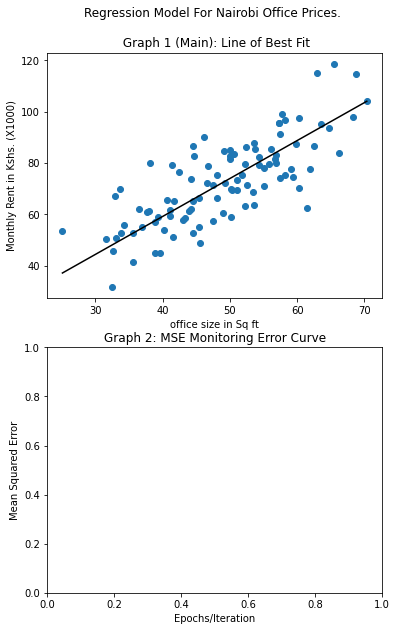

In [43]:
#Call gradient descent fit function
returned_params = gradient_descent_fit(m,c,N,L)
y_predicted=returned_params[0]
total_epochs=returned_params[1]
all_epoch_errors=returned_params[2]

#Create plot for both line of best fit and error reduction graphs
fig, (ax1,ax2)=plt.subplots(2,gridspec_kw={'top':2})
ax1.set(xlabel="office size in Sq ft")
ax1.set(ylabel="Monthly Rent in Kshs. (X1000)")
ax1.set_title("Regression Model For Nairobi Office Prices. \n\n Graph 1 (Main): Line of Best Fit")
ax1.scatter(X,Y)

#ax1.plot([min(X),max(X)], [min(y_predicted), max(y_predicted)], color='black')
ax1.plot([min(X),max(X)],[min(y_predicted),max(y_predicted)],color='black')
ax2.set_title("Graph 2: MSE Monitoring Error Curve")
ax2.set(xlabel="Epochs/Iteration")
ax2.set(ylabel="Mean Squared Error")
ax2.plot(total_epochs,all_epoch_errors)

#Destroy the used lists to prevent recarpetting on append
epoch_count_list.clear()
epoch_error_list.clear()